## Reference: 
[Python Data Science Handbook]( https://jakevdp.github.io/PythonDataScienceHandbook)

[Data Blog](https://xavierbourretsicotte.github.io/Kernel_feature_map.html#Plot-decision-boundary)

# Kenrels and Feature maps

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

#### Notation and terminology

* **Attributes** of a problem are the original inputs: $x_1, x_2,...x_n$
* **Feature mapping** is a function of the input attributes $\phi(x)$
* **Features** are the new set of quantities that result from applying the mapping

For example we could have
$$ \phi(x) = \begin{bmatrix} x \\ x^2 \\ x^3 \end{bmatrix}$$
To obtain more complex, nonlinear, decision boundaries, we may want to apply the SVM algorithm to learn some features $\phi(x)$ rather than the input attributes $x$ only. To do so we replace $x$ everywhere in the previous formuals with $\phi(x)$ and repeat the optimization procedure.

The problem is that the features may live in very <em>high dimensional space</em>, possibly infinite, which makes the computation of the dot product $\lt\phi(x^{(i)}),\phi(x^{(j)})\gt$ very difficult. This is where we introduce the notion of a <strong>Kernel</strong> which will greatly help us perform these computations.

#### Kernels: definition and example
                                                                   
Given a feature mapping $\phi$ we define the corresponding Kernel as
$$ K(x,z) = \phi(x)^T\phi(z)$$

Hence we can replace the inner product $\lt\phi(x),\phi(z)\gt$ with $K(x,z)$ in the SVM algorithm. What is interesting is that the kernel may be very inexpensive to calculate, and may correspond to a mapping in very high dimensional space. So we can train an SVM in such space without having to explicitly calculate the inner product.

Consider the example where $x,z \in \mathbb{R}^n$ and $K(x,z) = (x^Tz)^2$. We can also write this as
\begin{aligned}
    K(x,z) &= \left( \sum_i^n x_i z_i\right)  \left( \sum_j^n x_j z_j\right)
    \\
    &= \sum_i^n  \sum_j^n x_i x_j z_i z_j 
    \\
    &= \sum_{i,j}^n (x_i x_j )(z_i z_j)
    \\
    &= \phi(x)^T \phi(z)
\end{aligned}
Where the feature mapping $\phi$ is given by (in this case $n = 2$)
$$ \phi(x) = \begin{bmatrix} x_1 x_1 \\ x_1 x_2 \\ x_2x_1 \\ x_2 x_2 \end{bmatrix}$$

Calculating the feature mapping is of complexity $O(n^2)$ due to the number of features, whereas calculating $K(x,z)$ is of complexity $O(n)$ as it is a simple inner product $x^Tz$ which is then squared $K(x,z) = (x^Tz)^2$.

Another example of Kernel is
\begin{aligned}
    K(x,z) &= (x^Tz + c )^2
    \\
    &=  \sum_{i,j}^n (x_i x_j )(z_i z_j) + \sum_i^n (\sqrt{2c} x_i) (\sqrt{2c} x_i) + c^2
\end{aligned}
which corresponds to the features mapping
$$ \phi(x) = \begin{bmatrix} x_1 x_1 \\ x_1 x_2 \\ x_2x_1 \\ x_2 x_2 \\  \sqrt{2c} x_1 \\ \sqrt{2c} x_2\end{bmatrix}$$
so the parameter $c$ controls the relative weighting of the first and second order polynomials. More generally the kernel $K(x,z) = (x^Tz + c)^d$ corresponds to a feature mapping to an $\binom{n + d}{d}$ feature space, corresponding to all monomials that are up to order $d$. Despite working in this $O(n^d)$ dimensional space, computing $K(x,z)$ is of order $O(n)$.

<strong>An intuitive view</strong> of Kernels would be that they correspond to functions that measure how closely related vectors $x$ and $z$ are. So when $x$ and $z$ are similar the Kernel will output a large value, and when they are dissimilar K will be small. Knowing this justifies the use of the Gaussian Kernel as a measure of similarity
$$ K(x,z) = \exp \left( - \frac{||x-z||^2}{2 \sigma^2}\right)$$
because the value is close to 1 when they are similar and close to 0 when they are not.

#### Necessary and sufficient conditions

The following are necessary and sufficient conditions for a function to be a valid kernel. Let $G$ be the <strong>Kernel matrix</strong> or <strong>Gram matrix</strong> which is square of size $m \times m$ and where each $i,j$ entry corresponds to $G_{i,j} = K(x^{(i)}, x^{(j)})$ of the data set $X = \{x^{(1)}, ... , x^{(m)} \}$

The function $K : \mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}$ is a valid kernel if and only if
the kernel matrix $G$ is symmetric, positive semi-definite

This is both a <em>necessary</em> and <em>sufficient</em> condition and is called **Mercer's theorem**.

#### Properties

* Kernels are **symmetric**: $K(x,y) = K(y,x)$
* Kernels are **positive, semi-definite**: $\sum_{i=1}^m\sum_{j=1}^m c_i c_jK(x^{(i)},x^{(j)}) \geq 0$
* Sum of two kernels is a kernel: $K(x,y) = K_1(x,y) + K_2(x,y) $
* Product of two kernels is a kernel:  $K(x,y) = K_1(x,y) K_2(x,y) $
* Scaling by any function on both sides is a kernel: $K(x,y) = f(x) K_1(x,y) f(y)$
* Kernels are often scaled such that $K(x,y) \leq 1$ and $K(x,x) = 1$

#### Common Kernels
* Linear: is the inner product: $K(x,y) = x^T y$
* Gaussian/RBF/Radial : $K(x,y) = \exp ( - \gamma \|x - y\|^2)$
* Polynomial: is the inner product: $K(x,y) = (1 + x^T y)^p$
* Laplace: is the inner product: $K(x,y) = \exp ( - \beta \|x - y\|)$
* Cosine: is the inner product: $K(x,y) = \frac{x^T y}{\|x\| \|y\|}$

#### Gaussian kernels
In general the Squared Exponential Kernel, or Gaussian kernel is defined as
$$ K(\mathbf{x,x'}) = \exp \left( - \frac{1}{2} (\mathbf{x - x'})^T \Sigma^{-1} (\mathbf{x - x'}) \right)$$

If $\Sigma$ is diagnonal then this can be written as
$$ K(\mathbf{x,x'}) = \exp \left( - \frac{1}{2} \sum_{j = 1}^n \frac{1}{\sigma^2_j} (x_j - x'_j)^2 \right)$$
Where the parameter $\sigma^2_j$  is the characteristic length scale of dimension $j$. if $\sigma^2_j = \infty$ the dimension is ignored, hence this is known as the Automatic Relevance Determination (<strong>ARD</strong>) kernel.

Finally if  $\Sigma$  is spherical, we get the isotropic kernel
$$ K(\mathbf{x,x'}) = \exp \left( - \frac{ || \mathbf{x - x'} ||^2}{2\sigma^2} \right)$$
Which is a <strong>radial basis function</strong> or RBF kernel as it is only a function of $|| \mathbf{x - x'} ||^2$. $\sigma^2$ is known as the bandwidth parameter.

#### Gram Matrix vs Feature Map

Consider a dataset of $m$ data points which are $n$ dimensional vectors $\in \mathbb{R}^n$, the <strong>gram matrix</strong> is the $m \times m$ matrix for which each entry is the kernel between the corresponding data points.
$$ G_{i,j} = K(x^{(i)}, x^{(j)})$$

Since a Kernel function corresponds to an inner product in some (possibly infinite dimensional) feature space, we can also write the kernel as a <strong>feature mapping</strong>
$$ K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T \phi(x^{(j)})$$
When using a Kernel in a linear model, it is just like transforming the input data, then running the model in the transformed space.

For the linear kernel, the Gram matrix is simply the inner product $ G_{i,j} = x^{(i) \ T} x^{(j)}$. For other kernels, it is the inner product in a feature space with feature map $\phi$: i.e. $ G_{i,j} = \phi(x^{(i)})^T \ \phi(x^{(j)})$

#### From Feature Maps to Kernels

Kernel as the inner product in the transformed space
$$ K(\mathbf{x^{(i)}, x^{(j)}}) = \phi(\mathbf{x}^{(i)})^T \phi(\mathbf{x}^{(j)}) $$

Grams matrix as an outer product in the transformed space
$$G_{i,j} = K(\mathbf{x^{(i)}, x^{(j)}}) $$
$$ G = \tilde X \tilde X^T$$


##### Advantages and disadvantages of Gram matrix and Feature mapping    

<strong>Gram matrix</strong>: reduces computations by pre-computing the kernel for all pairs of training examples

* On the other hand, the Gram matrix may be impossible to hold in memory for large $m$
* The cost of taking the product of the Gram matrix with weight vector may be large

<strong>Feature maps</strong>: are computationally very efficient

* As long as we can transform and store the input data efficiently
* The drawback is that the dimension of transformed data may be much larger than the original data
* memory required to store the features and cost of taking the product to compute the gradient. 
* finally, feature maps may require infinite dimensional space (e.g. Gaussian Kernel) which requires approximation

As a result there exists systems trade offs and rules of thumb
* When the number of examples is very large, **feature maps are better**
* When transformed features have high dimensionality, **Grams matrices are better**

### Python implementation of various feature maps and kernels

In [83]:
from sklearn.datasets import make_circles

#### Feature map 1: Sum of polynomials 
$$ \phi(x_1, x_2) = (z_1,z_2,z_3) = (x_1,x_2, x_1^2 + x_2^2)$$

Text(0.5, 0.92, 'Transformed dataset')

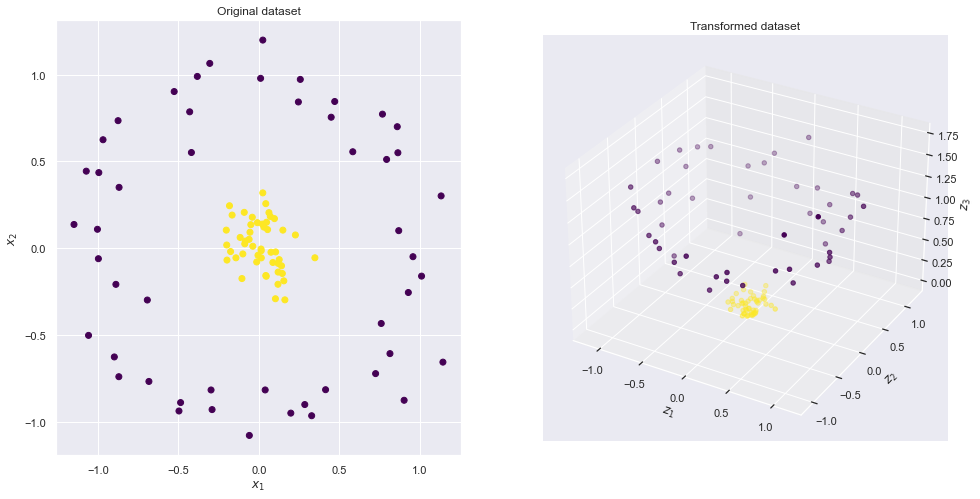

In [84]:
def feature_map_1(X):
    return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T

#Generate dataset and feature-map
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

#### Feature map 2: Gaussian Radial Basis Function (RBF) centered at 0,0
$$ \phi(x_1, x_2) = (z_1,z_2,z_3) = (x_1, x_2, e^{- (x_1^2 + x_2^2)})$$

Text(0.5, 0.92, 'Transformed dataset')

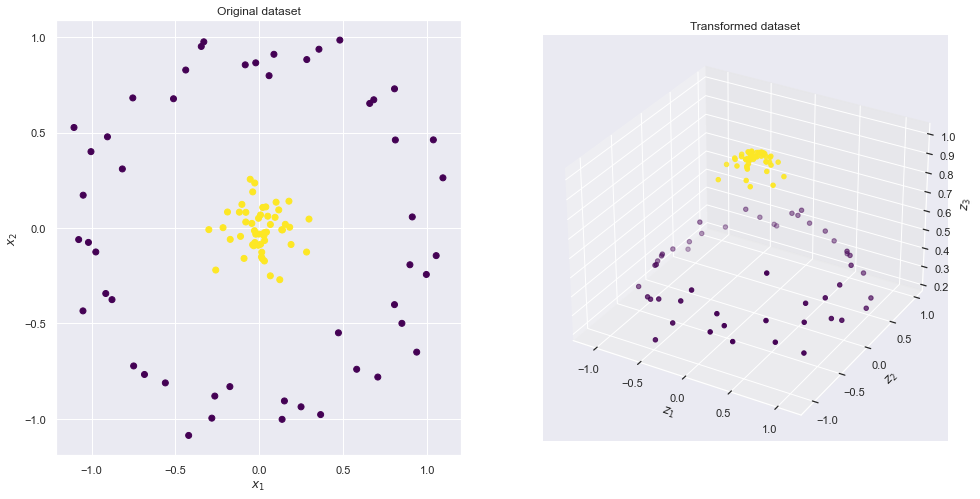

In [85]:
def feature_map_2(X):  
    return np.asarray((X[:,0], X[:,1], np.exp( -( X[:,0]**2 + X[:,1]**2)))).T

X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_2(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

#### Feature map 3: also a polynomial kernel

Let $d = 2$ and $\mathbf{x} = (x_1, x_2)^T$ we get
\begin{aligned}
    k(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \begin{pmatrix} x_1' \\ x_2' \end{pmatrix} ) &= (x_1x_2' + x_2x_2')^2
    \\
    &= 2x_1x_1'x_2x_2' + (x_1x_1')^2 + (x_2x_2')^2
    \\
    &= (\sqrt{2}x_1x_2  \ x_1^2 \ x_2^2) \ \begin{pmatrix} \sqrt{2}x_1'x_2' \\ x_1'^2  \\ x_2'^2 \end{pmatrix}
    \end{aligned}   
$$ k(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \begin{pmatrix} x_1' \\ x_2' \end{pmatrix} ) = \phi(\mathbf{x})^T \phi(\mathbf{x'})$$
Where
$$ \phi(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}) =\begin{pmatrix}  \sqrt{2}x_1x_2 \\ x_1^2 \\ x_2^2 \end{pmatrix}$$
In the plot of the transformed data we map 
$$ x_1, x_2 : \rightarrow z_1, z_2, z_3$$
$$ z_1 = \sqrt{2}x_1x_2 \ \   z_2 = x_1^2 \ \  z_3 = x_2^2$$

w = [-0.05481854 -2.53191791 -2.52028513] b = [1.14976292]


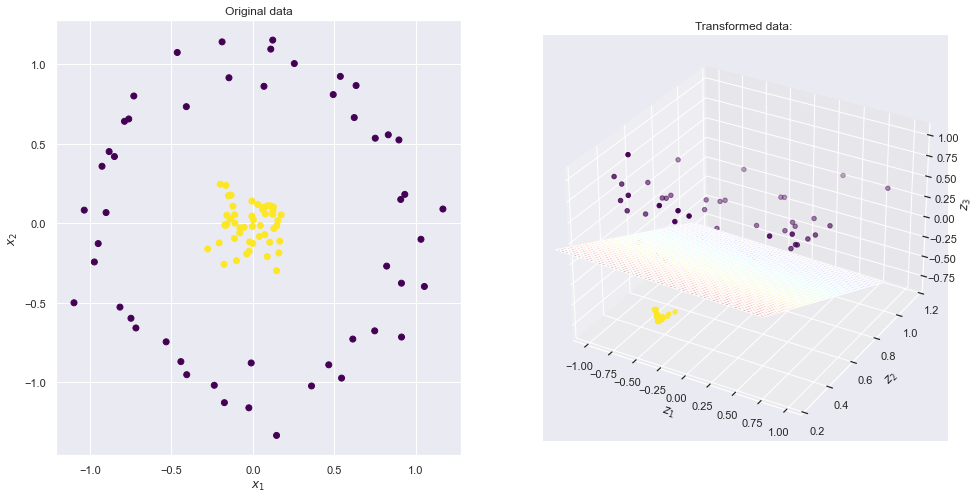

In [86]:
def feature_map_3(X):  
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

#Generate dataset and feature-map
X, y = make_circles(100, factor=.1, noise=.1, random_state = 0)
Z = feature_map_3(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original data')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed data: ')


from sklearn.svm import SVC # "Support vector classifier"
from matplotlib import cm

#SVM using kernel 3 - feature map 3
clf = SVC(C = 1, kernel = 'linear')
clf.fit(Z, y) 

w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print('w =',w,'b =',b)

# create x,y
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))

# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]

# plot the surface

ax.plot_surface(xx, yy, boundary, alpha = .4, cmap=cm.jet)
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
#ax.view_init(0, 260)

plt.show()

### Sklearn implementation of SVC with Gram matrix

In [87]:
from sklearn.metrics import accuracy_score

clf = SVC(kernel='precomputed')

# kernel computation
Z = feature_map_2(X)
print(Z.shape)
gram = np.dot(Z, Z.T)
print(gram.shape)
clf.fit(gram, y) 

# prediction errors on training examples
np.sum(y - clf.predict(gram))

(100, 3)
(100, 100)


0

### Sklearn implementation using custom Kernel

In [88]:
def my_kernel_1(X,Y):
    return np.dot(feature_map_1(X), feature_map_1(Y).T )

def my_kernel_2(X,Y):
    return np.dot(feature_map_2(X), feature_map_2(Y).T )

def my_kernel_3(X,Y):
    return np.dot(feature_map_3(X), feature_map_3(Y).T )

#SVM using kernel 1 - feature map 1
clf = SVC(kernel=my_kernel_1)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n1', accuracy_score(y, clf.predict(X)))

#SVM using kernel 2 - feature map 2
clf = SVC(kernel=my_kernel_2)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n2', accuracy_score(y, clf.predict(X)))

#SVM using kernel 3 - feature map 3
clf = SVC(kernel=my_kernel_3)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n3', accuracy_score(y, clf.predict(X)))


Accuracy score using feature map n1 1.0
Accuracy score using feature map n2 1.0
Accuracy score using feature map n3 1.0


### Plot decision boundary¶

Text(0, 0.5, '$x_2$')

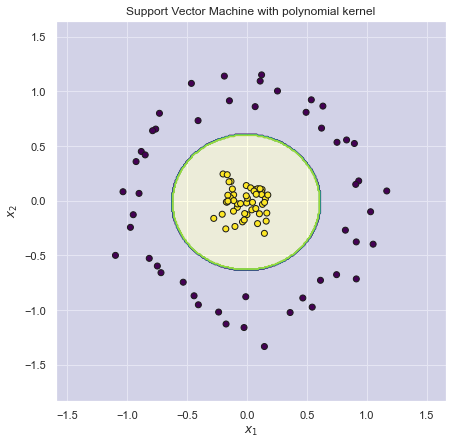

In [89]:
clf = SVC(kernel=my_kernel_2, C = 1)
# kernel computation
clf.fit(X, y) 

#Initialize data
h = .01 #Stepsize in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize = (7,7))
plt.contourf(xx, yy, Z, levels=1, colors = ['darkblue','yellow'], alpha = .1)
plt.contour(xx, yy, Z, cmap = 'viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors = 'k')
plt.title('Support Vector Machine with polynomial'
          ' kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

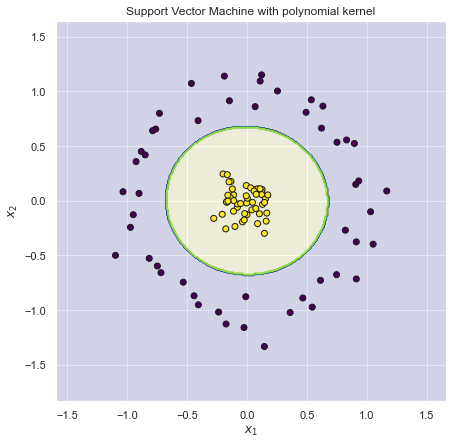

In [90]:
clf = SVC(kernel=my_kernel_3, C = 1)
# kernel computation
clf.fit(X, y) 

#Initialize data
h = .01 #Stepsize in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize = (7,7))
plt.contourf(xx, yy, Z, levels=1, colors = ['darkblue','yellow'], alpha = .1)
plt.contour(xx, yy, Z, cmap = 'viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors = 'k')
plt.title('Support Vector Machine with polynomial'
          ' kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?
For example, you may have data like this:

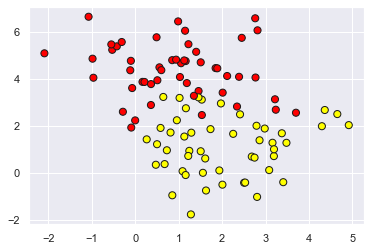

In [91]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='k');

### Cost function

\begin{split}
&\min_{\beta_0, \beta} \frac{1}{2}\|\beta\|_2+C\sum_{i=1}^{m}\xi_i\\
&\quad\text{s.t}\quad y_i(\beta_0 + \beta^{T}x_{i}) \geq 1-\xi_i,\quad i=1,\cdots, m \\
&\qquad \quad \xi_i \geq 0,\quad i=1,\cdots,m
\end{split}

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as `C`.
For very large `C`, the margin is hard, and points cannot lie in it.
For smaller `C`, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

In [92]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, 
                   facecolors='none',
                   edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

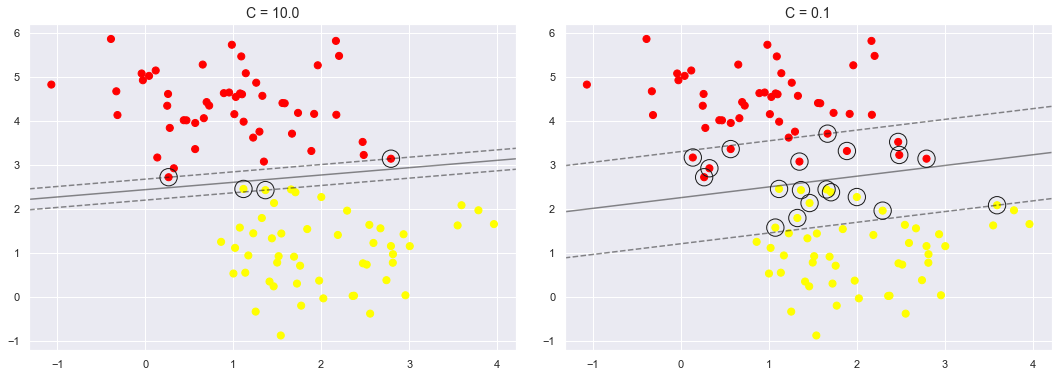

In [93]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation.

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


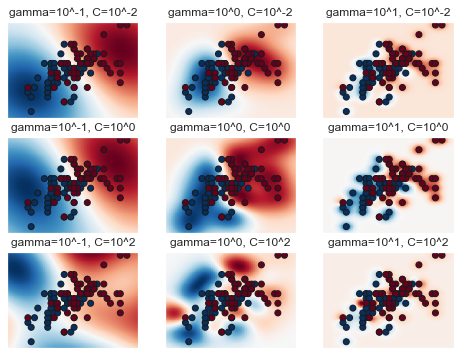

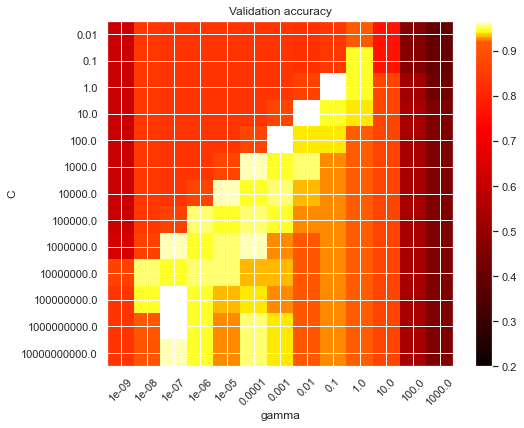

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu, shading='auto')
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()


### RBF SVM Parameters

Intuitively, the `gamma` parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The `gamma` parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The `C` parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of `C`, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower `C` will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words `C` behaves as a regularization parameter in the SVM.

The behavior of the model is very sensitive to the `gamma` parameter. If `gamma` is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with `C` will be able to prevent overfitting.

When `gamma` is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can be found on a diagonal of `C` and `gamma`. Smooth models (lower `gamma` values) can be made more complex by increasing the importance of classifying each point correctly (larger `C` values) hence the diagonal of good performing models.

Finally, one can also observe that for some intermediate values of `gamma` we get equally performing models when `C` becomes very large. This suggests that the set of support vectors does not change anymore. The radius of the RBF kernel alone acts as a good structural regularizer. Increasing `C` further doesn’t help, likely because there are no more training points in violation (inside the margin or wrongly classified), or at least no better solution can be found. Scores being equal, it may make sense to use the smaller `C` values, since very high `C` values typically increase fitting time.

On the other hand, lower `C` values generally lead to more support vectors, which may increase prediction time. Therefore, lowering the value of `C` involves a trade-off between fitting time and prediction time.

## Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into Scikit-Learn:

In [94]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


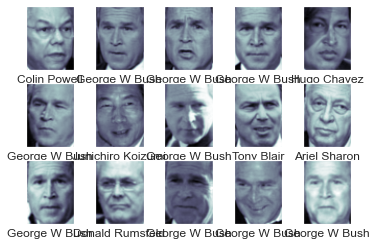

In [95]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [96]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [97]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [98]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 28s, sys: 21 s, total: 1min 49s
Wall time: 18.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [99]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

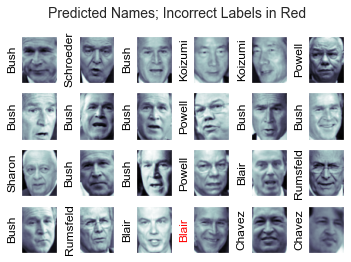

In [100]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [101]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

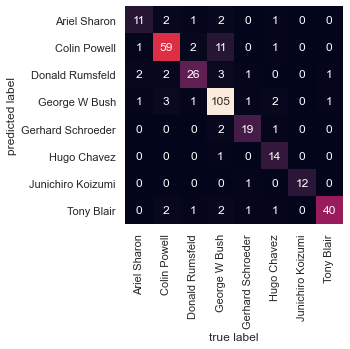

In [102]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.

## Support Vector Machine Summary

We have seen here a brief intuitive introduction to the principals behind support vector machines.
These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the ``probability`` parameter of ``SVC``), but this extra estimation is costly.

With those traits in mind, one generally only turns to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for their needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.


### Regression
The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

In [103]:
from sklearn import svm

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

regr = svm.SVR()
regr.fit(X, y)
regr.predict([[1, 1]])

array([1.5])